In [37]:
import modelo
from importlib import reload
reload(modelo)
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import truncnorm, lognorm, binom, norm

In [38]:
def generar_proxima_llegada():
    mean_stay = 0.5  # Mean stay in weeks
    std_stay = 0.2  # Standard deviation of stay in weeks
    norm_dist = norm(mean_stay, std_stay)
    
    while True:
        r = norm_dist.rvs()
        if r > 0:
            return r


def generar_monto_honorarios():
    # Define the bounds
    lower_bound = 8

    # Adjust parameters to achieve the desired CDF at 20
    mu = np.log(10)  # Mean of the underlying normal distribution (to achieve CDF(20) = 50%)
    sigma = 0.5  # Standard deviation of the underlying normal distribution

    # Calculate parameters of the lognormal distribution
    s = sigma
    scale = np.exp(mu)

    # Generate random values from lognormal distribution
    return int(lognorm.rvs(s=s, scale=scale, loc=lower_bound))

def generar_duracion_consulta():
    # Parameters for binomial distribution
    n = 25  # Number of weeks
    p = 0.3  # Probability of leaving within 25 weeks
    binom_dist = binom(n, p)

    # Parameters for normal distribution (long-term stay)
    mean_stay = 208  # Mean stay in weeks
    std_stay = 100
    lower_bound = 0
    upper_bound = float("inf")  # Standard deviation of stay in weeks
    norm_dist = truncnorm(loc = mean_stay, scale = std_stay, a=(lower_bound - mean_stay) / std_stay, b=(upper_bound - mean_stay) / std_stay)

    if np.random.random() > 0.3:
        return int(norm_dist.rvs())
    else:
        return int(binom_dist.rvs())

In [39]:
def plot_random_frequency(random_function, num_samples=1000):
    # Generate random values using the provided function
    random_values = [random_function() for _ in range(num_samples)]
    
    # Create histogram
    plt.hist(random_values, bins=50, color='skyblue', edgecolor='black')
    
    # Add labels and title
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title('Frequency of Random Values')
    
    # Show plot
    plt.show()

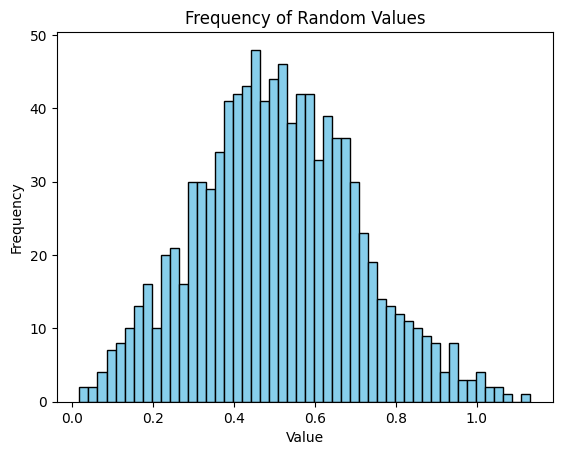

In [40]:
plot_random_frequency(generar_proxima_llegada)


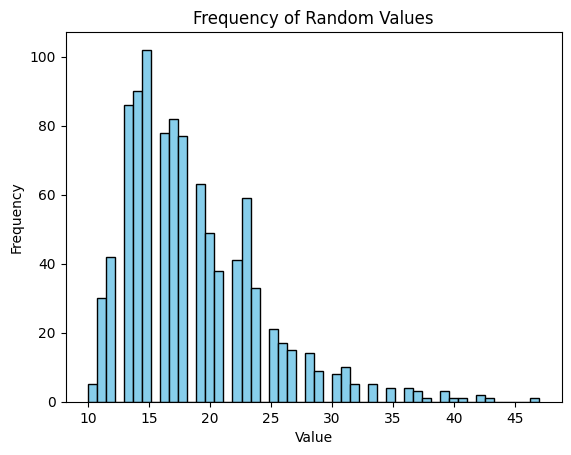

In [41]:
plot_random_frequency(generar_monto_honorarios)

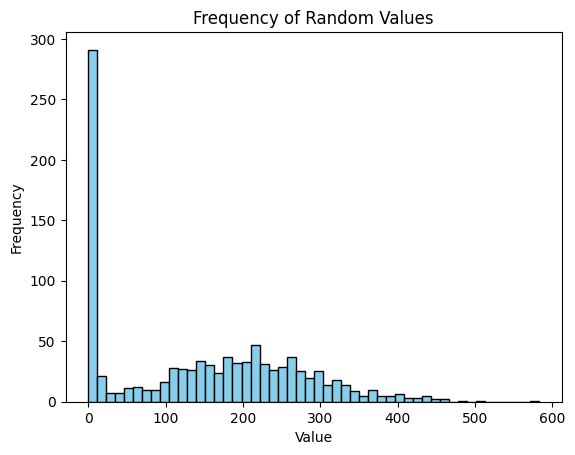

In [42]:
plot_random_frequency(generar_duracion_consulta)